# Problem 1
Remember from last week we discussed that skewness and kurtosis functions in statistical packages are often biased. Is your function biased? Prove or disprove your hypothesis.

In [83]:
# First load all libraries needed to solve this problem, using "pip install" would be necessary if any libraries are reported missing in local environment.
import numpy as np
from scipy.stats import kurtosis, ttest_1samp, t, describe, norm, skew

In [103]:
sample_size = [100, 1000, 100000] # as we know, when sample size increases, the biased and unbiased parameters should converge to their true value, and we are interested in whether it is true, so we allow it to vary
sample_round = [100, 1000] # as shown during class, with fewer sample rounds (we have less kurtosis to examine), we have less statistical power to detect bias, even if it exists, and we are also interested in whether it is true, so we also allow it to vary

expected_kurt = 0 # the expected kurtosis for normal distribution in scipy package is adjusted to be 0
threshold = 0.05 # the threshold that we consider statistically significant
for i in sample_size:
    num_kurts = 0 # help to track the numbers of kurtosis generated
    for j in sample_round:
        print("current sample size is", i)
        print("current sample round is", j)
        kurts_b = np.empty(j) # initialize an empty dataframe of numbers = sample_round to store kurt_biased calculated during this loop
        kurts_ub = np.empty(j) # empty dataframe for kurt_unbiased
        data = np.random.normal(0, 1, i) # initialize random normal distributed data to calculate kurt
        kurts_b[num_kurts] = kurtosis(data) # generate the kurtosis_biased from the random normal distribution
        kurts_ub[num_kurts] = kurtosis(data, bias = False) # generate the kurtosis_unbiased
        t_stat, p_val = ttest_1samp(kurts_b, expected_kurt) # test the kurtosis_biased

        mean_kurts_b = np.mean(kurts_b)
        mean_kurts_ub = np.mean(kurts_ub)
        print("during this assessment, the biased kurtosis is", mean_kurts_b, ", the unbiased kurtosis is", mean_kurts_ub)

        if p_val < threshold:
            print("p-value is", p_val, "and we rejected null hypothesis and it is biased")
        else:
            print("p-value is", p_val, "and we fail to reject null hypothesis and it can be unbiased")

        num_kurts += 1
        print("")

current sample size is 100
current sample round is 100
during this assessment, the biased kurtosis is 1.9767168240769968 , the unbiased kurtosis is 0.03695892320070393
p-value is 1.075058861189645e-30 and we rejected null hypothesis and it is biased

current sample size is 100
current sample round is 1000
during this assessment, the biased kurtosis is -0.0005921987067233788 , the unbiased kurtosis is nan
p-value is 0.3175526601764128 and we fail to reject null hypothesis and it can be unbiased

current sample size is 1000
current sample round is 100
during this assessment, the biased kurtosis is 2.292823248055042 , the unbiased kurtosis is 0.008709928686785709
p-value is 2.3651961116424044e-06 and we rejected null hypothesis and it is biased

current sample size is 1000
current sample round is 1000
during this assessment, the biased kurtosis is 2.9183043376797957 , the unbiased kurtosis is -0.0010510432495105064
p-value is 4.350860338359538e-26 and we rejected null hypothesis and it is

In [91]:
# same procedure, but to test the skewness
sample_size = [10, 1000, 100000]
sample_round = [10, 100, 1000]

expected_skew = 0 # the expected skewness for normal distribution is 0
threshold = 0.05
for i in sample_size:
    num_skews = 0
    for j in sample_round:
        print("current sample size is {}" .format(i))
        print("current sample round is {}" .format(j))
        skews_b = np.empty(j)
        skews_ub = np.empty(j)
        data = np.random.normal(0, 1, i) # initialize random normal distributed data to calculate skew
        skews_b[num_skews] = skew(data)
        skews_ub[num_skews] = skew(data, bias = False)
        t_stat, p_val = ttest_1samp(skews_b, expected_skew)

        mean_skews_b = np.mean(skews_b)
        mean_skews_ub = np.mean(skews_ub)
        print("during this assessment, the biased skewness is", mean_skews_b, ", the unbiased skewness is", mean_skews_ub)

        if p_val < threshold:
            print("p-value is", p_val, ", and we rejected null hypothesis and it is biased")
        else:
            print("p-value is", p_val, ", and we fail to reject null hypothesis and it can be unbiased")

        num_skews += 1
        print("")

# Caveat: no random seeds have been set during normal distribution generation process, results may differ each time the code runs

current sample size is 10
current sample round is 10
during this assessment, the biased skewness is 0.06588531866870338 , the unbiased skewness is 0.07813037675966826
p-value is 0.34343639613791355 , and we fail to reject null hypothesis and it can be unbiased

current sample size is 10
current sample round is 100
during this assessment, the biased skewness is 1.9808722624481738 , the unbiased skewness is 0.039028462765009674
p-value is 6.805896059382383e-31 , and we rejected null hypothesis and it is biased

current sample size is 10
current sample round is 1000
during this assessment, the biased skewness is 3.139750759461969e+274 , the unbiased skewness is 3.3446021174354605e+274
p-value is 1.0 , and we fail to reject null hypothesis and it can be unbiased

current sample size is 1000
current sample round is 10
during this assessment, the biased skewness is -0.5595146015598806 , the unbiased skewness is -0.11618485407372944
p-value is 0.45064008618112217 , and we fail to reject null 

/Users/yanghaochen/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


# Problem 2
Fit the data in problem2.csv using OLS and calculate the error vector. Look at its distribution. How well does it fit the assumption of normally distributed errors? Fit the data using MLE given the assumption of normality. Then fit the MLE using the assumption of a T distribution of the errors. Which is the best fit? What are the fitted parameters of each and how do they compare? What does this tell us about the breaking of the normality assumption in regards to expected values in this case?

In [92]:
# load library
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew, t, ttest_1samp, norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.optimize import minimize

In [93]:
# load the data to dataframe
df = pd.read_csv("problem2.csv")
Y = df["y"]
x = df["x"]
X = sm.add_constant(x)

# OLS fit under normal distribution
OLS = sm.OLS(Y, X)
OLS_result = OLS.fit()
print(OLS_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     23.68
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           4.34e-06
Time:                        10:03:51   Log-Likelihood:                -159.99
No. Observations:                 100   AIC:                             324.0
Df Residuals:                      98   BIC:                             329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1198      0.121      0.990      0.3

0   -0.838485
1    0.835296
2    1.027428
3    1.319711
4   -0.152317
dtype: float64
mean is -3.8857805861880476e-17
variance is 1.4361484854062607
skewness is -0.26726658552879606
kurtosis is 3.1931010009568777


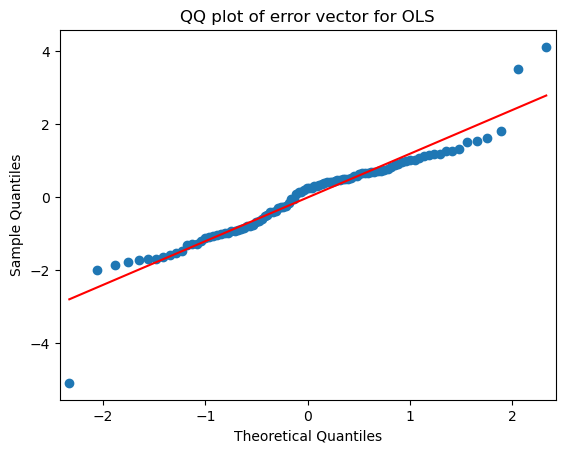

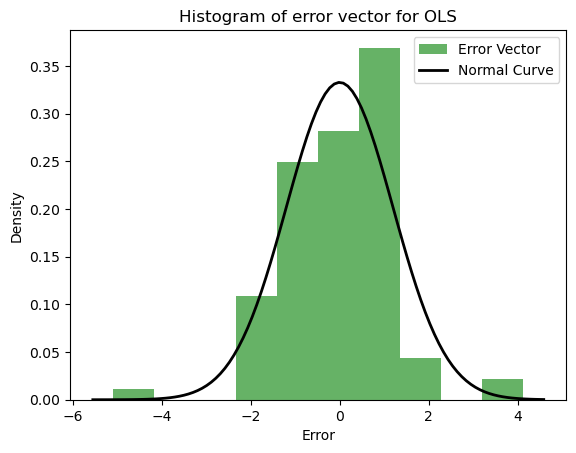

In [96]:
# obtain OLS's residual
Y_predict = OLS_result.predict(X)
err_vec_ols = Y - Y_predict

print(err_vec_ols.head())

# examine OLS's residual
mean_res_ols = np.mean(err_vec_ols)
var_res_ols = np.var(err_vec_ols)
skew_res_ols = skew(err_vec_ols)
kur_res_ols = kurtosis(err_vec_ols)
print("mean is {}" .format(mean_res_ols))
print("variance is {}" .format(var_res_ols))
print("skewness is {}" .format(skew_res_ols))
print("kurtosis is {}" .format(kur_res_ols))

# visualisation: QQ plot
fig = sm.qqplot(err_vec_ols, line='s')  # 's' for standardized line
plt.title("QQ plot of error vector for OLS")
plt.show()

# visualisation: histogram and normal distribution
plt.hist(err_vec_ols, bins=10, density=True, alpha=0.6, color='g', label='Error Vector')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(err_vec_ols), np.std(err_vec_ols))
plt.plot(x, p, 'k', linewidth=2, label='Normal Curve')

# Add labels and title
plt.title("Histogram of error vector for OLS")
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

In [97]:
# below we would assess the goodness of fit through R^2 and adjusted R^2, AIC and BIC
# obtain R squared and adjusted R squared
R2_ols = OLS_result.rsquared
adj_R2_ols = OLS_result.rsquared_adj
print(R2_ols, adj_R2_ols)
# obtain AIC and BIC
AIC_ols = OLS_result.aic
BIC_ols = OLS_result.bic
print(AIC_ols, BIC_ols)

0.19463952391895079 0.18642155987730746
323.9841933783246 329.1945337503008


In [98]:
# reload the data to prevent data leakage
df = pd.read_csv("problem2.csv")
Y = df["y"]
x = df["x"]
X = sm.add_constant(x) # to include the intercept term, a column of 1s are added to the feature matrix X to become [1, X1, X2,...]

# MLE fit under normal distribution
# log-likelihood function for MLE under normal distribution
def loglike_mle_nd(paras, Y, x): # para include intercept, slope and sigma, and Y is dependent variable while x is independent variable
    intercep, slope, sigma = paras
    Y_predict = intercep + slope * x
    nll = -np.sum(norm.logpdf(Y, loc = Y_predict, scale = sigma))
    return nll

# optimize and fit MLE
init = (1, 1, 1) # need initial guess to enable the optimization to start
MLE_result_nd = minimize(fun = loglike_mle_nd, x0 = init, args = (Y,x))
print(MLE_result_nd)

      fun: 159.9920966891625
 hess_inv: array([[ 1.42083109e-02, -1.06286391e-04, -6.03001775e-05],
       [-1.06286391e-04,  1.53428108e-02, -3.15255082e-04],
       [-6.03001775e-05, -3.15255082e-04,  7.44927901e-03]])
      jac: array([ 1.90734863e-06,  1.90734863e-06, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([0.11983619, 0.60520485, 1.19839408])


In [99]:
# below we would assess the goodness of fit through error vector, R^2 and adjusted R^2, AIC and BIC
# obtain the error vector
paras_opt_mle_nd = MLE_result_nd.x
intercep_opt_mle_nd, slope_opt_mle_nd, sigma_opt_mle_nd = paras_opt_mle_nd
err_vec_mle_nd = Y - intercep_opt_mle_nd - slope_opt_mle_nd * x

mean_res_mle_nd = np.mean(err_vec_mle_nd)
var_res_mle_nd = np.var(err_vec_mle_nd)
skew_res_mle_nd = skew(err_vec_mle_nd)
kur_res_mle_nd = kurtosis(err_vec_mle_nd)

print("mean is {}" .format(mean_res_mle_nd))
print("variance is {}" .format(var_res_mle_nd))
print("skewness is {}" .format(skew_res_mle_nd))
print("kurtosis is {}" .format(kur_res_mle_nd))

# obtain R squared and adjusted R squared
Y_predict_mle_nd = intercep_opt_mle_nd + slope_opt_mle_nd * x
TSS_mle_nd = np.sum((Y - np.mean(Y)) ** 2)
RSS_mle_nd = np.sum((err_vec_mle_nd - np.mean(err_vec_mle_nd)) ** 2)
R2_mle_nd = 1 - (RSS_mle_nd / TSS_mle_nd)

n = len(Y)  # number of observations
p = 1  # number of parameters excluding constant, num_x
adj_R2_mle_nd = 1 - ((1 - R2_mle_nd) * (n - 1) / (n - p - 1))
print("R2: ", R2_mle_nd)
print("adjusted R2: ", adj_R2_mle_nd)

# obtain AIC
loglikeli_mle_nd = -MLE_result_nd.fun
AIC_mle_nd = 2 * 2 - 2 * loglikeli_mle_nd

adj_AIC_mle_nd = 2 * (2+1) - 2 * loglikeli_mle_nd # k should be 2 (num_beta) + 1 (sigma)

# obtain BIC
BIC_mle_nd = np.log(n) * 2 - 2 * loglikeli_mle_nd
print("AIC: ", AIC_mle_nd)
print("BIC: ", BIC_mle_nd)

mean is 4.89632799416384e-09
variance is 1.436148485406263
skewness is -0.2672666013603062
kurtosis is 3.193100931518015
R2:  0.19463952391895
adjusted R2:  0.1864215598773067
AIC:  323.984193378325
BIC:  329.1945337503012


In [100]:
# reload the data to prevent data leakage
df = pd.read_csv("problem2.csv")
Y = df["y"]
x = df["x"]

def loglike_mle_t(paras, Y, x):
    intercep, slope, sigma, nu = paras
    Y_predict = intercep + slope * x
    nll = -np.sum(t.logpdf(Y, df = nu, loc = Y_predict, scale = sigma ))
    return nll

init = (1,1,1,1)
MLE_result_t = minimize(fun = loglike_mle_t, x0 = init, args = (Y,x))
print(MLE_result_t)

      fun: 155.47297041247222
 hess_inv: array([[ 1.22405341e-02,  5.18555852e-04, -2.70727826e-03,
        -8.78546873e-02],
       [ 5.18555852e-04,  1.29244549e-02, -7.74787476e-05,
        -1.12637433e-03],
       [-2.70727826e-03, -7.74787476e-05,  1.16887526e-02,
         2.23793246e-01],
       [-8.78546873e-02, -1.12637433e-03,  2.23793246e-01,
         9.24888732e+00]])
      jac: array([-1.90734863e-05, -7.62939453e-06, -5.72204590e-06,  1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 250
      nit: 16
     njev: 48
   status: 2
  success: False
        x: array([0.14261386, 0.5575716 , 0.97126576, 6.2765526 ])


In [101]:
# below we would assess the goodness of fit through error vector, R^2 and adjusted R^2, AIC and BIC
# obtain the error vector
paras_opt_mle_t = MLE_result_t.x
intercep_opt_mle_t, slope_opt_mle_t, sigma_opt_mle_t, nu_opt_mle_t = paras_opt_mle_t
err_vec_mle_t = Y - intercep_opt_mle_t - slope_opt_mle_t * x

mean_res_mle_t = np.mean(err_vec_mle_t)
var_res_mle_t = np.var(err_vec_mle_t)
skew_res_mle_t = skew(err_vec_mle_t)
kur_res_mle_t = kurtosis(err_vec_mle_t)

print("mean is {}" .format(mean_res_mle_t))
print("variance is {}" .format(var_res_mle_t))
print("skewness is {}" .format(skew_res_mle_t))
print("kurtosis is {}" .format(kur_res_mle_t))

# obtain R squared and adjusted R squared
Y_predict_mle_t = intercep_opt_mle_t + slope_opt_mle_t * x
TSS_mle_t = np.sum((Y - np.mean(Y)) ** 2)
RSS_mle_t = np.sum((err_vec_mle_t - np.mean(err_vec_mle_t)) ** 2)
R2_mle_t = 1 - (RSS_mle_t / TSS_mle_t)

n = len(Y)  # number of observations
p = 1  # number of parameters excluding constant, num_x
adj_R2_mle_t = 1 - ((1 - R2_mle_t) * (n - 1) / (n - p - 1))

print("R2: ", R2_mle_t)
print("adjusted R2: ", adj_R2_mle_t)
# obtain AIC
loglikeli_mle_t = -MLE_result_t.fun
AIC_mle_t = 2 * 2 - 2 * loglikeli_mle_t

# obtain BIC
BIC_mle_t = np.log(n) * 2 - 2 * loglikeli_mle_t
print("AIC: ", AIC_mle_t)
print("BIC: ", BIC_mle_t)

mean is -0.02278278260646311
variance is 1.4382985682976803
skewness is -0.2425400975430655
kurtosis is 3.2850798083461408
R2:  0.1934338047341707
adjusted R2:  0.18520353743553986
AIC:  314.94594082494444
BIC:  320.15628119692065


# Problem 3
Simulate AR(1) through AR(3) and MA(1) through MA(3) processes. Compare their ACF and PACF graphs. How do the graphs help us to identify the type and order of each process?

In [74]:
# load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# set the number of data points
n = 3000

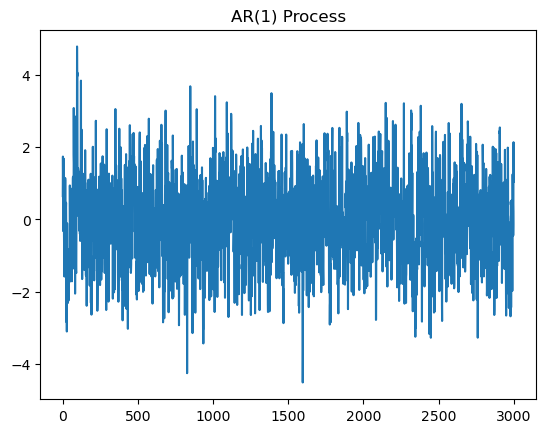

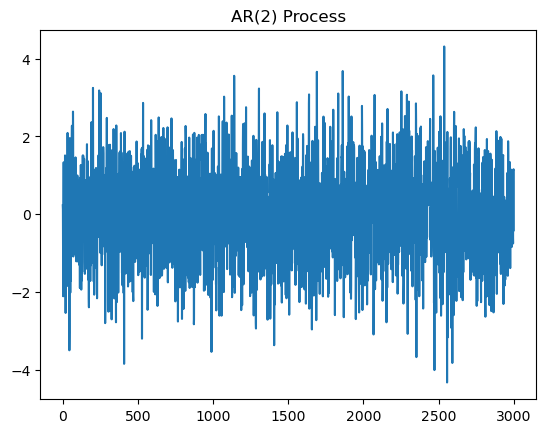

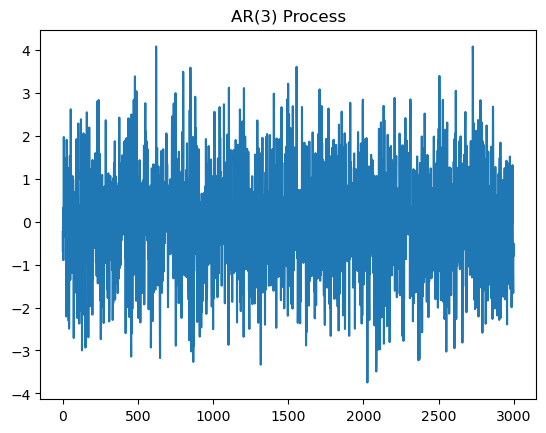

In [79]:
# simulate AR(1) to AR(3)
# since we are using arma_generate_sample, we can turn down the MA by setting ma parameter to unit vector [1]
ma_shut = np.array([1])

# AR(1)
ar1 = np.array([1, -0.5])  # Yt = -0.5 * Yt-1 + epsilon, 1 represent the zero-lag term in AR
y_ar1 = sm.tsa.arma_generate_sample(ar = ar1, ma = ma_shut, nsample = n)
plt.title('AR(1) Process')
plt.plot(y_ar1)
plt.show()

# AR(2)
ar2 = np.array([1, -0.5, 0.3]) # Yt = -0.5 * Yt-1 + 0.3 * Yt-2 + epsilon
y_ar2 = sm.tsa.arma_generate_sample(ar = ar2, ma = ma_shut, nsample = n)
plt.title('AR(2) Process')
plt.plot(y_ar2)
plt.show()

# AR(3)
ar3 = np.array([1, -0.5, 0.3, -0.1]) # Yt = -0.5 * Yt-1 + 0.3 * Yt-2 - 0.1 * Yt-2 + epsilon
y_ar3 = sm.tsa.arma_generate_sample(ar = ar3, ma = ma_shut, nsample = n)
plt.title('AR(3) Process')
plt.plot(y_ar3)
plt.show()

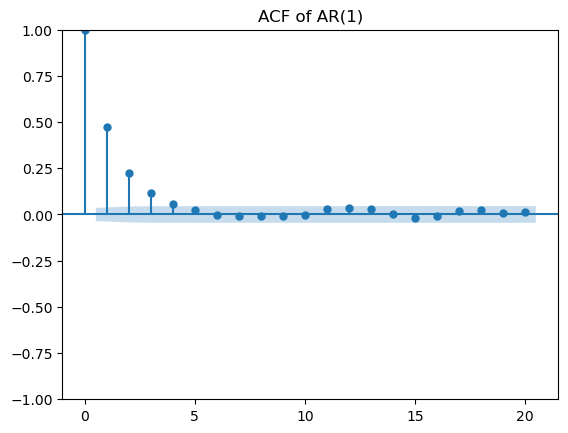

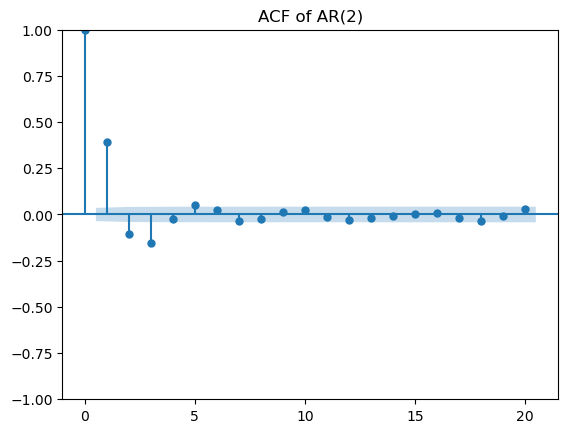

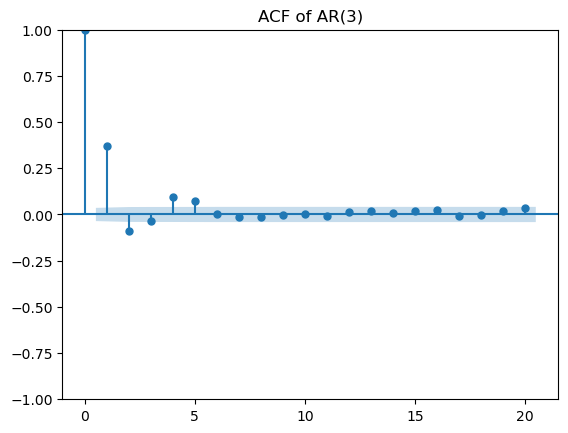

In [76]:
# ACF for AR(1), AR(2), AR(3)
sm.graphics.tsa.plot_acf(y_ar1, lags = 20)
plt.title("ACF of AR(1)")
plt.show()

sm.graphics.tsa.plot_acf(y_ar2, lags = 20)
plt.title("ACF of AR(2)")
plt.show()

sm.graphics.tsa.plot_acf(y_ar3, lags = 20)
plt.title("ACF of AR(3)")
plt.show()

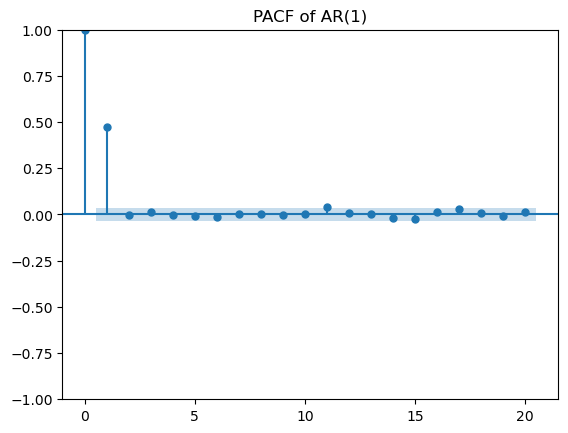

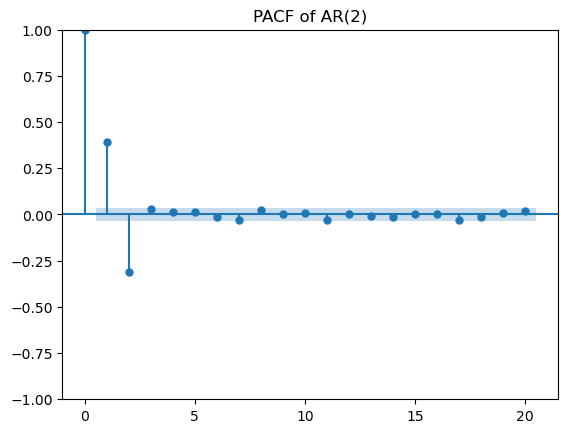

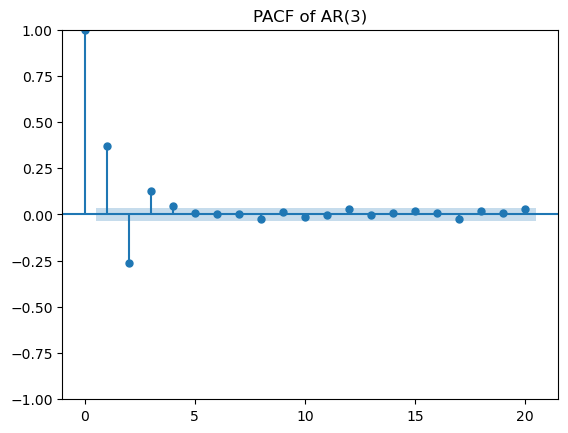

In [77]:
# PACF for AR(1), AR(2), AR(3)
sm.graphics.tsa.plot_pacf(y_ar1, lags = 20)
plt.title("PACF of AR(1)")
plt.show()

sm.graphics.tsa.plot_pacf(y_ar2, lags = 20)
plt.title("PACF of AR(2)")
plt.show()

sm.graphics.tsa.plot_pacf(y_ar3, lags = 20)
plt.title("PACF of AR(3)")
plt.show()

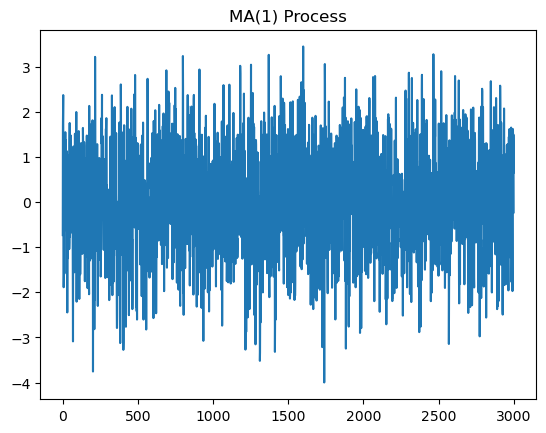

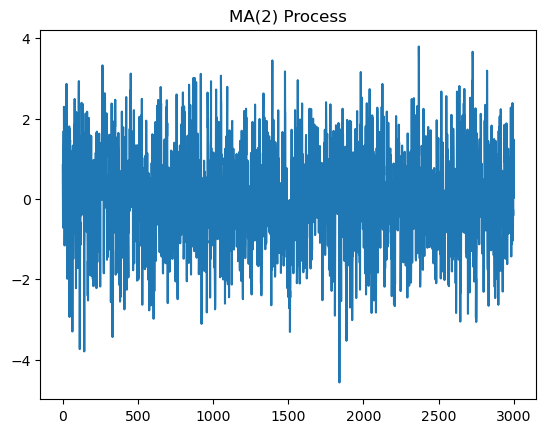

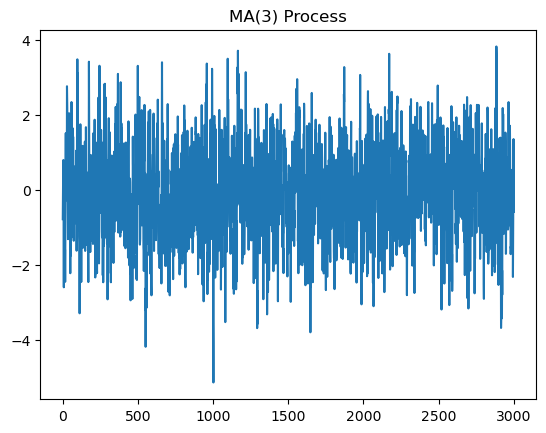

In [80]:
# similarly, setting ar to [1] shuts ar down, thus we have pure MA
ar_shut = [1]

# MA(1)
ma_1 = np.array([1, 0.5])
y_ma1 = sm.tsa.arma_generate_sample(ar = ar_shut, ma = ma_1, nsample=n)
plt.title('MA(1) Process')
plt.plot(y_ma1)
plt.show()

# MA(2)
ma_2 = np.array([1, 0.5, 0.3])
y_ma2 = sm.tsa.arma_generate_sample(ar= ar_shut, ma=ma_2, nsample=n)
plt.title('MA(2) Process')
plt.plot(y_ma2)
plt.show()

# MA(3)
ma_3 = np.array([1, 0.5, 0.3, 0.2])
y_ma3 = sm.tsa.arma_generate_sample(ar= ar_shut, ma=ma_3, nsample=n)
plt.title('MA(3) Process')
plt.plot(y_ma3)
plt.show()


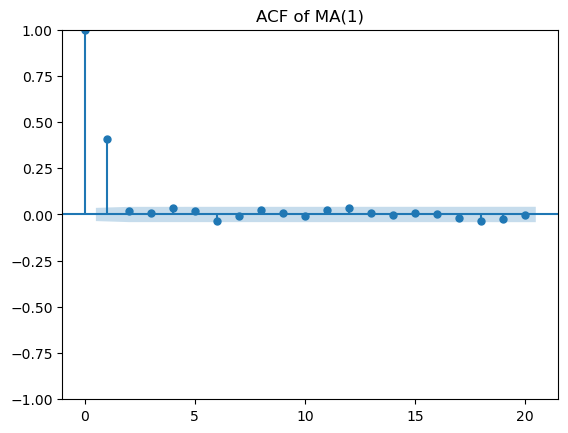

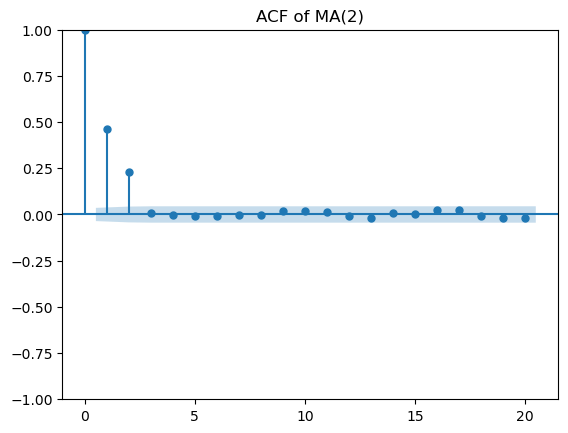

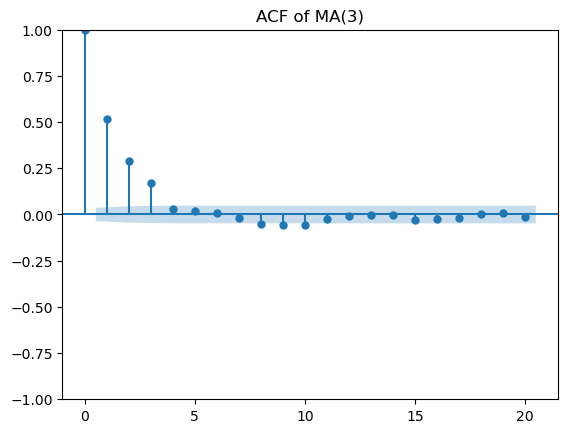

In [81]:
# ACF for MA(1), MA(2), MA(3)
sm.graphics.tsa.plot_acf(y_ma1, lags = 20)
plt.title("ACF of MA(1)")
plt.show()

sm.graphics.tsa.plot_acf(y_ma2, lags = 20)
plt.title("ACF of MA(2)")
plt.show()

sm.graphics.tsa.plot_acf(y_ma3, lags = 20)
plt.title("ACF of MA(3)")
plt.show()

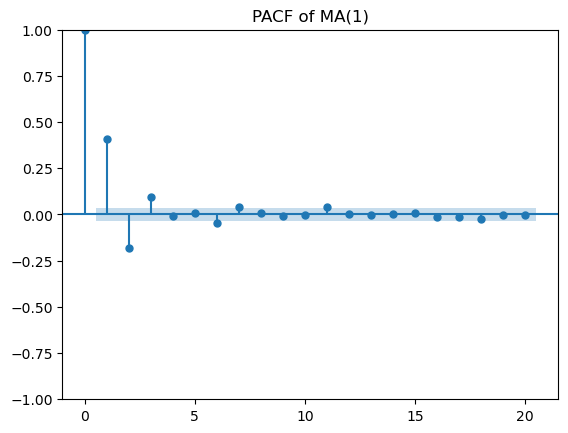

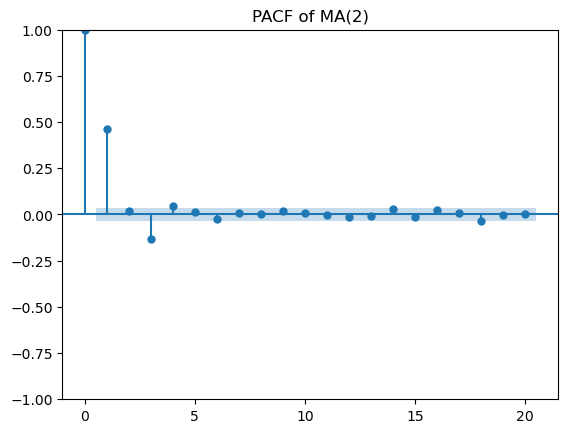

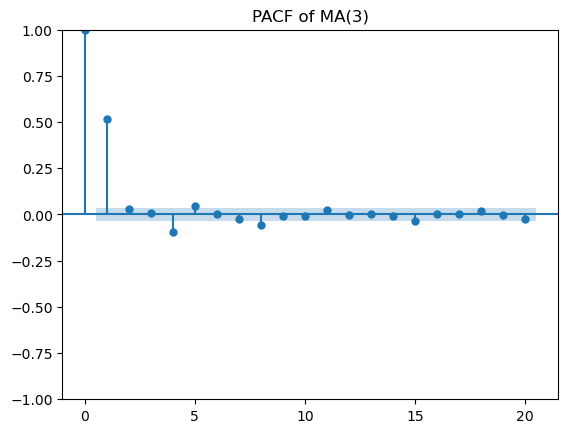

In [82]:
# PACF for MA(1), MA(2), MA(3)
sm.graphics.tsa.plot_pacf(y_ma1, lags = 20)
plt.title("PACF of MA(1)")
plt.show()

sm.graphics.tsa.plot_pacf(y_ma2, lags = 20)
plt.title("PACF of MA(2)")
plt.show()

sm.graphics.tsa.plot_pacf(y_ma3, lags = 20)
plt.title("PACF of MA(3)")
plt.show()